In [1]:
import pandas as pd;

In [2]:
import ModelAuto as ma;

In [3]:
#Load train and test data into python data frame
train_data = pd.read_csv("C:\\Users\\trobi\\OneDrive\\Desktop\\Data Science and Technologies\\Project\\train.csv")
test_data = pd.read_csv("C:\\Users\\trobi\\OneDrive\\Desktop\\Data Science and Technologies\\Project\\test.csv")

In [4]:
no_of_null_values = train_data.isna().sum()

In [5]:
no_of_null_values.to_csv('C:\\Users\\trobi\\ain = ma.Datapreprocess.handel_nan(train) 
test = ma.Datapreprocess.handel_nan(test)OneDrive\\Desktop\\Data Science and Technologies\\Project\\no_of_null_values.csv',index=True)

In [6]:
train = train_data.copy()
test = test_data.copy()

In [9]:
#In this step handel_nan will remove columns that has more than 50% null values
train = ma.Datapreprocess.handel_nan(train) 
test = ma.Datapreprocess.handel_nan(test)

In [8]:
train.to_csv('C:\\Users\\trobi\\OneDrive\\Desktop\\Data Science and Technologies\\Project\\train_new.csv',index=True)
#If I check the csv file the total number of columns present now is 77 previously it was 81

In [10]:
#Storing Saleprice column in a separate variable this SalePrice will be the target column
Y = train['SalePrice'] 

In [11]:
#Storing All other columns in a separate variable except for SalePrice, for all this columns  we need to find out SalePrice
X = train.drop(['SalePrice','Id'],axis=1)

In [12]:
test = test.drop(['Id'],axis=1)

In [13]:
#The below code will scale the data between 0,1 by default
train = ma.Datapreprocess.handel_standardization(X)
test = ma.Datapreprocess.handel_standardization(test)

In [14]:
print(train)

      MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0       0.235294       RL     0.150685  0.033420   Pave      Reg         Lvl   
1       0.000000       RL     0.202055  0.038795   Pave      Reg         Lvl   
2       0.235294       RL     0.160959  0.046507   Pave      IR1         Lvl   
3       0.294118       RL     0.133562  0.038561   Pave      IR1         Lvl   
4       0.235294       RL     0.215753  0.060576   Pave      IR1         Lvl   
...          ...      ...          ...       ...    ...      ...         ...   
1455    0.235294       RL     0.140411  0.030929   Pave      Reg         Lvl   
1456    0.000000       RL     0.219178  0.055505   Pave      Reg         Lvl   
1457    0.294118       RL     0.154110  0.036187   Pave      Reg         Lvl   
1458    0.000000       RL     0.160959  0.039342   Pave      Reg         Lvl   
1459    0.000000       RL     0.184932  0.040370   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ...

,Features,No_of_Catagorical
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2


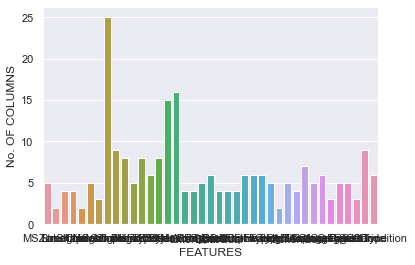

In [15]:
#Shows the number of categorical values in each column
count = ma.No_of_Catagorical(train)
count.head(5)

In [17]:
#Assigns the value between 0 and 1 for the categorical variables
Train, Test = ma.Datapreprocess.handel_Catagorical(train,test)

In [18]:
Train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0,0,0,0,1,0,0,0,1,0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0,0,0,0,1,0,0,0,1,0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0,0,0,0,1,0,0,0,1,0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0,0,0,0,1,0,0,0,1,0


Feature Analysing...
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

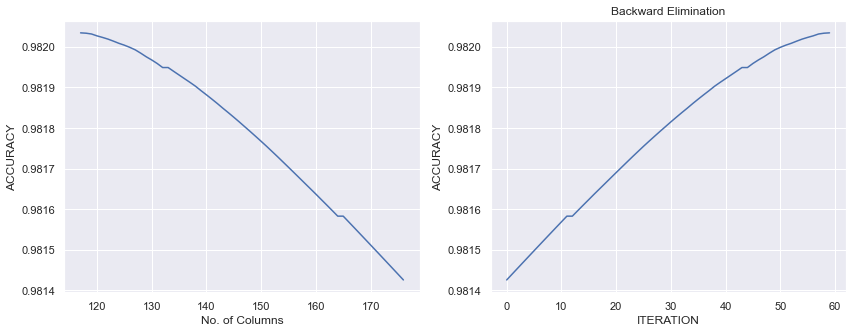

In [19]:
#The dataset - Train (All Columns except SalePrice), Y-Target Column (SalePrice)
feature = ma.FeatureSelection.backwardElimination(Train,Y) 
# It gives the best value with PValue less than 0.5
# Accuracy is improving by the removal of attributes

In [20]:
feature.head() 
# Out of 176 columns 60 columns are removed for the improvement of accuracy

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,...,Attchd,BuiltIn,CarPort,Detchd,RFn,CWD,Con,ConLD,New,Normal
0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.140098,0.413559,...,1,0,0,0,1,0,0,0,0,1
1,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.206547,0.000000,...,1,0,0,0,1,0,0,0,0,1
2,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.150573,0.419370,...,1,0,0,0,1,0,0,0,0,1
3,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.123732,0.366102,...,0,0,0,1,0,0,0,0,0,0
4,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.187398,0.509927,...,1,0,0,0,1,0,0,0,0,1


Regression Model Selection...

Linear Regression ...
Rsq : 0.8578292669893564

Polinomial Regression ...
Rsq : -1.8329526926263995e-05

SVM Model ...
Rsq : -0.04007285602025745

Desision Tree ...
Rsq :  0.8245557077401292

Random Forest ...
Rsq : 0.8832226468288839


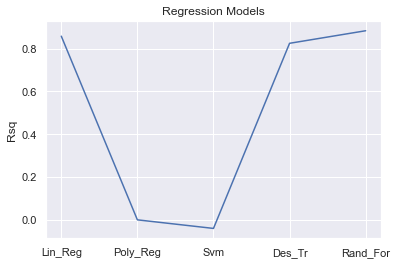

In [21]:
#Choose the best model, It gives value for each model and also displays chart
model = ma.ModelSelection.Regress_model(feature,Y) 

In [22]:
#Predicting the values for the Test data with the best model
subb = model.predict(Test.loc[:,feature.columns]) 

In [23]:
result_set = pd.DataFrame({'Id':test_data['Id'],'SalePrice':subb})

In [24]:
print(result_set)

        Id  SalePrice
0     1461  131690.50
1     1462  161106.00
2     1463  209431.30
3     1464  206428.50
4     1465  224684.31
...    ...        ...
1454  2915   98333.00
1455  2916   95733.14
1456  2917  163242.27
1457  2918  131216.57
1458  2919  276495.70

[1459 rows x 2 columns]


In [25]:
#Exporting the results to csv
result_set.to_csv('C:\\Users\\trobi\\OneDrive\\Desktop\\Data Science and Technologies\\Project\\ds_project_results.csv',index=False)